In [1]:
import dask  # noqa
import datatree
import xarray as xr

from ndpyramid import pyramid_reproject

In [2]:
# Open the dataset
ds = xr.open_zarr(
    'https://rice1.osn.mghpcc.org/carbonplan/cp-cmip/version1/rechunked_data/GARD-SV/ScenarioMIP.CCCma.CanESM5.ssp245.r1i1p1f1.month.GARD-SV.tasmax.zarr'
)
ds = ds.rio.write_crs("EPSG:4326")

In [3]:
%%time
# Generate pyramids using rioxarray's reproject function
levels = 2
reprojected_pyramid = pyramid_reproject(ds, levels=levels, resampling="bilinear")
output_uri = 's3://carbonplan-scratch/pyramid_comparison/reprojected.zarr'
reprojected_pyramid.to_zarr(output_uri, consolidated=True, mode='w')

CPU times: user 1min 31s, sys: 31.9 s, total: 2min 3s
Wall time: 2min 1s


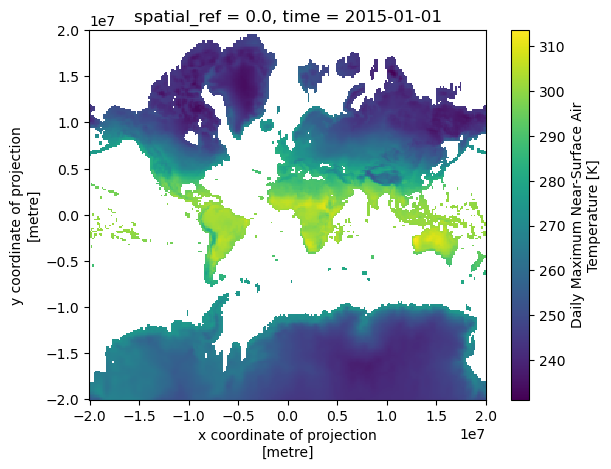

In [4]:
# Open and plot the result
dt = datatree.open_datatree(output_uri, engine="zarr")
dt["1"].ds.isel(time=0).tasmax.plot()